In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import csv

In [2]:
results = []
removals = [0]
with open("data.csv") as csvfile:
    reader = csv.reader(csvfile) 
    for row in reader: 
        results.append(row)
saveResults = [results[0]]
for i in range(1, len(results)):
        for j in [4,5,6,7,9,10]:
            if "-" not in results[i][j] and "(" not in results[i][j]:
                results[i][j] = float(results[i][j])
            else:
                removals.append(i)
        saveResults.append(results[i])

for i in removals:
    del results[i]
print(len(results))
print(len(saveResults))
#removals

77
83


In [3]:
saveResults[0]

['WD #',
 'NAME',
 'alpha (2000.0)',
 'delta (2000.0)',
 'Teff',
 'log g',
 'V Mag.',
 'Amp. (%)',
 'Periods (sec)',
 'Min. Period',
 'Max. Period',
 'filler']

In [4]:
results[4]

['0111+0018',
 'SDSS0111+0018',
 '01 11 01',
 '+00 18 07',
 11510.0,
 8.26,
 18.76,
 14.0,
 '255-292',
 255.0,
 292.0]

In [5]:
DATA = {}
allnames = ['WD','NAME','ALPHA','DELTA', 'T EFF', 'LOG G', 'V MAG', 'AMP', 'PERIOD', 'NPERIOD', 'MIN PER', 'MAX PER']
DATA['WD'] = []
DATA['NAME'] = []
DATA['ALPHA'] = []
DATA['DELTA'] = []
DATA['T EFF'] = []
DATA['LOG G'] = []
DATA['V MAG'] = []
DATA['AMP'] = []
DATA['PERIOD'] = []
DATA['MIN PER'] = []
DATA['MAX PER'] = []
#DATA['FILLER'] = []
for el in results:
    DATA['WD'].append(el[0])
    DATA['NAME'].append(el[1])
    DATA['ALPHA'].append(el[2])
    DATA['DELTA'].append(el[3])
    DATA['T EFF'].append(el[4]) ##
    DATA['LOG G'].append(el[5])##
    DATA['V MAG'].append(el[6])##
    DATA['AMP'].append(el[7])##
    DATA['PERIOD'].append(el[8])
    DATA['MIN PER'].append(el[9])##
    DATA['MAX PER'].append(el[10])##
    #DATA['FILLER'].append(el[11])
DATA['NPERIOD'] = []
for j in range(0, len(DATA['PERIOD'])):
    x = 0
    i = DATA['PERIOD'][j]
    if "-" in i:
        x = ( float(i.split("-")[0]) + float(i.split("-")[1])) /2
    else:
        x = float(i)
    DATA['NPERIOD'].append(x)    
    #print(str(j) + ") " + i + "--------------------" + str(DATA['NPERIOD'][j]))


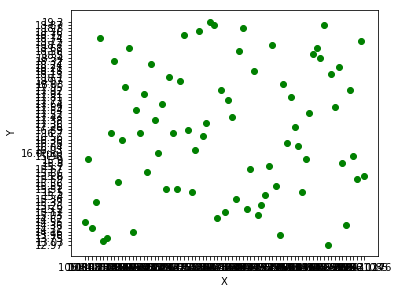

In [6]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(5,4)
fig.tight_layout()
ax.set_xlabel("X")
ax.set_ylabel("Y")


ax.plot(DATA['PERIOD'], DATA['V MAG'], "g.", markersize=12, )
#ax.plot(time_list, comparison_apertures['frac of comp2'], label = 'Control')
#ax.legend(loc=0,shadow=True);

In [7]:
#fig,ax = plt.subplots(1,1)
#fig.set_size_inches(11,8.5)
#fig.tight_layout()
#ax.plot(DATA['PERIOD'], DATA['T EFF'], "r.", markersize=12, )


In [8]:
#fig,ax = plt.subplots(1,1)
#fig.set_size_inches(11,8.5)
#fig.tight_layout()
#ax.plot(DATA['PERIOD'], DATA['LOG G'], "y.", markersize=12, )
removeList = []
for i in range(0, len(DATA['T EFF'])-1):
    for j in allnames:
        if DATA[j][i] is '-':
            #for k in range(0, len(allnames)-1):
            if i not in removeList:
                removeList.append(i)
            #removeList.append(i)
for i in removeList[::-1]:
    for k in allnames:
        del DATA[k][i]
for j in allnames:
    print(len(DATA[j]))
removeList[::-1]

75
75
75
75
75
75
75
75
75
75
75
75


[59, 33]

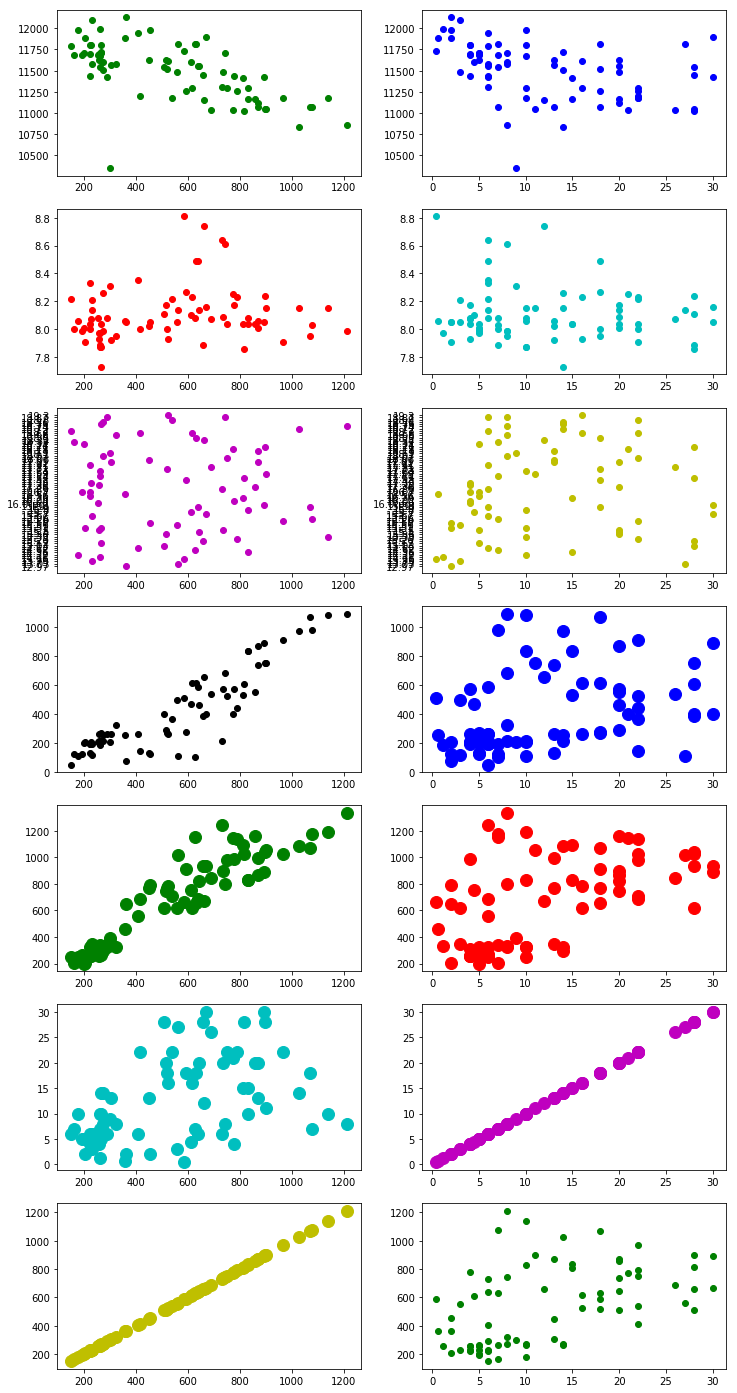

In [9]:
num_comp = ['T EFF', 'LOG G', 'V MAG', 'MIN PER', 'MAX PER', 'AMP', 'NPERIOD']
compare_to = ['NPERIOD', 'AMP']
graph_cols = ['g.', 'b.', 'r.', 'c.', 'm.', 'y.', 'k.', 'bo', 'go', 'ro', 'co', 'mo', 'yo']
c = 0
c_a = 0
j_c = 0
f, axarr = plt.subplots(len(num_comp), 2)
f.set_size_inches(12,25)
corrs = []
for i in num_comp:
    j_c = 0
    for j in compare_to:
        fig.set_size_inches(5,4)
        fig.tight_layout()
        ax.set_xlabel(j)
        ax.set_ylabel(i)
        # print(j)
        # print(i)
        axarr[c_a][j_c].plot(DATA[j], DATA[i], graph_cols[c], markersize=12)
        j_c = 1
        c = c+1
        if c > len(graph_cols)-1:
            c = 0
        #corrs.append([j, i, np.correlate(DATA[j], DATA[i])])
    c_a = c_a+1

In [10]:
# comments:
# the minimum period vs period looks nice but duh
# T_EFF and LOG_G look the most usable realistically
# idk anything
from numpy.polynomial.polynomial import polyfit


11906.854160886825
-0.764878494606666
315.9178996301738
1442.5048259431296
11371.43921466216


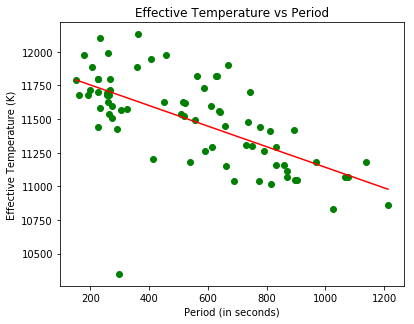

In [17]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(5.5, 4.25)
fig.tight_layout()
#corrs.append(['PERIOD', 'T EFF', np.correlate(DATA['PERIOD'], DATA['T EFF'])])
ax.plot(DATA['NPERIOD'], DATA['T EFF'], "g.", markersize=12 )
b, m = polyfit(DATA['NPERIOD'], DATA['T EFF'], 1)
intn = []
for i in DATA['NPERIOD']:
    intn.append(b + i*m)
intn = [b+min(DATA['NPERIOD'])*m,b+max(DATA['NPERIOD'])*m]
intnx = [min(DATA['NPERIOD']), max(DATA['NPERIOD'])]
#ax.plot(DATA['NPERIOD'], intn, 'r-')
ax.set_xlabel("Period (in seconds)")
ax.set_ylabel("Effective Temperature (K)")
ax.plot(intnx, intn, 'r-')
plt.title("Effective Temperature vs Period")
#ax.show()
print(b)
print(m)

er = []
for i in DATA['NPERIOD']:
    er.append(abs((b + i*m)-(DATA['T EFF'])))
print(np.mean(er))
print(np.max(er))
print(b+m*700)

11695.308945942283
-16.65088815246688
289.22353556378005
1338.648590681296
11686.250862787341


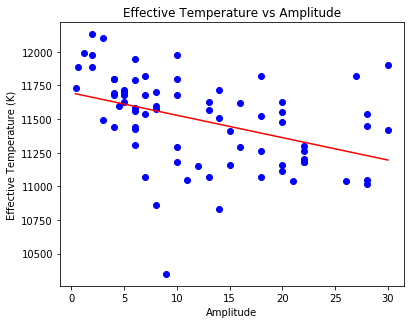

In [18]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(5.5, 4.25)
fig.tight_layout()
#corrs.append(['PERIOD', 'T EFF', np.correlate(DATA['PERIOD'], DATA['T EFF'])])
ax.plot(DATA['AMP'], DATA['T EFF'], "b.", markersize=12 )
b, m = polyfit(DATA['AMP'], DATA['T EFF'], 1)
intn = []
for i in DATA['AMP']:
    intn.append(b + i*m)
intn = [b+min(DATA['AMP'])*m,b+max(DATA['AMP'])*m]
intnx = [min(DATA['AMP']), max(DATA['AMP'])]
#ax.plot(DATA['NPERIOD'], intn, 'r-')
ax.set_xlabel("Amplitude")
ax.set_ylabel("Effective Temperature (K)")
ax.plot(intnx, intn, 'r-')
plt.title("Effective Temperature vs Amplitude")
#ax.show()
print(b)
print(m)
er = []
for i in DATA['AMP']:
    er.append(abs((b + i*m)-(DATA['T EFF'])))
print(np.mean(er))
print(np.max(er))
print(b+m*.544)

8.048401895999413
0.00011314616923468204
0.14277738538562468
0.7446827517000028
8.127604214463691


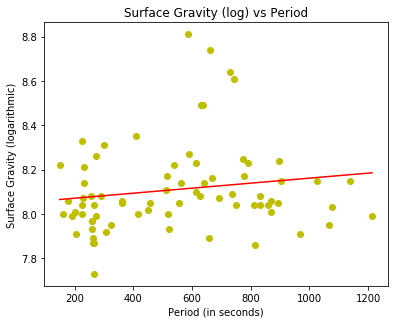

In [16]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(5.5, 4.25)
fig.tight_layout()
#corrs.append(['PERIOD', 'T EFF', np.correlate(DATA['PERIOD'], DATA['T EFF'])])
ax.plot(DATA['NPERIOD'], DATA['LOG G'], "y.", markersize=12 )
b, m = polyfit(DATA['NPERIOD'], DATA['LOG G'], 1)
intn = []
for i in DATA['NPERIOD']:
    intn.append(b + i*m)
intn = [b+min(DATA['NPERIOD'])*m,b+max(DATA['NPERIOD'])*m]
intnx = [min(DATA['NPERIOD']), max(DATA['NPERIOD'])]
#ax.plot(DATA['NPERIOD'], intn, 'r-')
ax.set_xlabel("Period (in seconds)")
ax.set_ylabel("Surface Gravity (logarithmic)")
ax.plot(intnx, intn, 'r-')
plt.title("Surface Gravity (log) vs Period")
#ax.show()
print(b)
print(m)
er = []
for i in DATA['NPERIOD']:
    er.append(abs((b + i*m)-(DATA['LOG G'])))
print(np.mean(er))
print(np.max(er))
print(b+m*700)

272.28325669702303
11.424573579757556
242.29690906966735
813.1469138710739
278.49822472441116


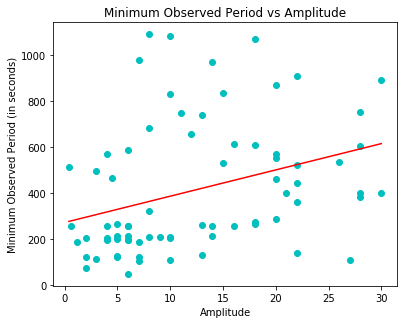

In [19]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(5.5, 4.25)
fig.tight_layout()
#corrs.append(['PERIOD', 'T EFF', np.correlate(DATA['PERIOD'], DATA['T EFF'])])
ax.plot(DATA['AMP'], DATA['MIN PER'], "c.", markersize=12 )
b, m = polyfit(DATA['AMP'], DATA['MIN PER'], 1)
intn = []
for i in DATA['AMP']:
    intn.append(b + i*m)
intn = [b+min(DATA['AMP'])*m,b+max(DATA['AMP'])*m]
intnx = [min(DATA['AMP']), max(DATA['AMP'])]
#ax.plot(DATA['NPERIOD'], intn, 'r-')
ax.set_xlabel("Amplitude")
ax.set_ylabel("Minimum Observed Period (in seconds)")
ax.plot(intnx, intn, 'r-')
plt.title("Minimum Observed Period vs Amplitude")
#ax.show()
print(b)
print(m)
er = []
for i in DATA['AMP']:
    er.append(abs((b + i*m)-(DATA['MIN PER'])))
print(np.mean(er))
print(np.max(er))
print(b+.544*m)

In [27]:
#NTS: DATA['AMP'] is a percent
#del DATA['V MAG'][-5]
#del DATA['NPERIOD'][-5]

16.742531529209295
-3.8464542426381314e-05
1.425003906390471
3.7667810801165498
16.71560634951083


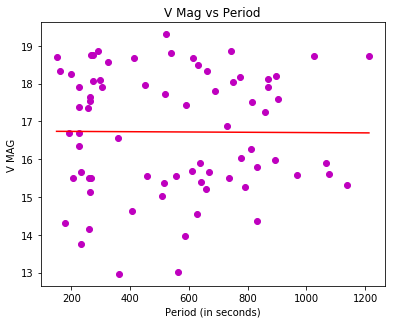

In [28]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(5.5, 4.25)
fig.tight_layout()
ax.plot(DATA['NPERIOD'], DATA['V MAG'], "m.", markersize=12 )
b, m = polyfit(DATA['NPERIOD'], DATA['V MAG'], 1)
intn = []
for i in DATA['NPERIOD']:
    intn.append(b + i*m)
intn = [b+min(DATA['NPERIOD'])*m,b+max(DATA['NPERIOD'])*m]
intnx = [min(DATA['NPERIOD']), max(DATA['NPERIOD'])]
#ax.plot(DATA['NPERIOD'], intn, 'r-')
ax.set_xlabel("Period (in seconds)")
ax.set_ylabel("V MAG")
ax.plot(intnx, intn, 'r-')
plt.title("V Mag vs Period")
#ax.show()
print(b)
print(m)

er = []
for i in DATA['NPERIOD']:
    er.append(abs((b + i*m)-(DATA['V MAG'])))
print(np.mean(er))
print(np.max(er))
print(b+m*700)